# Python 简单数据可视化

我们在开始数据分析之前，先把我们拿到之后，先做一个数据可视化的工作，我们会有一个对数据的大概感觉，有了这个基础之后，我们再开始做进一步的数据处理，或者套用相应的模型会更加事半功倍。本篇将演示如何使用 Python 做一些简单的数据可视化的工作。  

*Jupyter-Notebook 直接显示绘图*  
如果我们想在 Jupyter-Notebook 中直接显示绘图，可以添加一下一行代码：  
```python
%matplotlib inline
```


In [1]:
%matplotlib inline

In [2]:
# 引入相应的绘图库 matplotlib
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 简单曲线图
首先我们先来演示一个简单的曲线图，我们将使用 tushare 库来获取我国历年的 gdp ，然后使用 matplotlib 来绘制曲线图。  

*注意*  
由于 matplotlib 默认不支持中文标签，因此我们在本篇例文中均使用英文绘图，中文的问题我们留在另外解决。

In [3]:
import tushare as ts

In [4]:
gdp_y = ts.get_gdp_year()

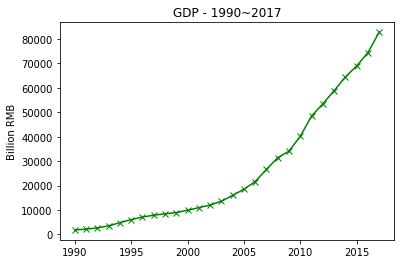

In [5]:
years = gdp_y.year[:28]
gdp = gdp_y.gdp[:28] / 10

# 创建曲线图，x 轴为年份， y 轴为 gdp
plt.plot(years, gdp, color='green', marker='x', linestyle='solid')
# 设置 x 标题
plt.title('GDP - 1990~2017')
# 设置 y 轴 标记
plt.ylabel('Billion RMB')
plt.show()

## 直方图
如果要看一组数据的变化趋势，如 B站 的视频观看数量分布，我们可以使用直方图来看。简单的直方图可以世界使用  
```python
plt.bar(x, y)
```  
即可，然而，在更多的情况下，我们想看数据的细分组成，如 GDP 不同部分对增长拉动的影响，我们就可以使用堆叠直方图来看。以下将使用 tushare 获取 GDP 三大产业对 GDP 整张拉动的直方图绘图演示。

   year  gdp_yoy   pi   si  industry   ti
1  2016      6.7  0.3  2.6       2.1  3.9
2  2015      6.9  0.3  2.9       2.4  3.7
3  2014      7.3  0.3  3.5       2.9  3.5
4  2013      7.8  0.3  3.8       3.1  3.7
5  2012      7.9  0.4  3.9       3.3  3.5
6  2011      9.5  0.4  5.0       4.4  4.2
7  2010     10.6  0.4  6.1       5.3  4.2
8  2009      9.2  0.4  4.9       3.8  4.1
9  2008      9.6  0.5  4.7       4.2  4.5


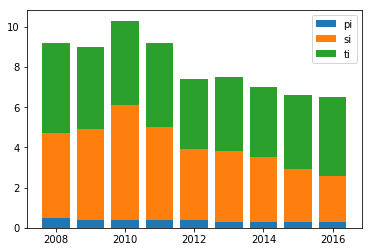

In [6]:
gdp_pull = ts.get_gdp_pull()
print(gdp_pull[1:10])
gdp_pull_years = gdp_pull.year[1:10]
gdp_pull_pi = gdp_pull.pi[1:10] # 第一产业
gdp_pull_si = gdp_pull.si[1:10] # 第二产业
gdp_pull_ti = gdp_pull.ti[1:10] # 第三产业
plt.bar(gdp_pull_years, gdp_pull_pi, label='pi')
plt.bar(gdp_pull_years, gdp_pull_si, bottom=gdp_pull_pi, label='si')
plt.bar(gdp_pull_years, gdp_pull_ti, bottom=gdp_pull_si, label='ti')
plt.legend()
plt.show()

## 股票指数对比图
在我们分析数据的时候，如在分析不同股票价格行情之间的对比，或者不同行业板块的关联性对比，我们可以使用相应的算法来进行处理和分析，但是，如果我们在做具体分析之前，先把数据进行可视化处理，就能大概的了解方向，这样可以大大的减少我们的计算以及代码的工作量。  

以下我将演示使用 tusahre 获取 *沪深300指数* 及 *医疗行业板块指数* 进行对比，分别对每日涨跌幅以及指数标准化后的数据进行可视化比较。

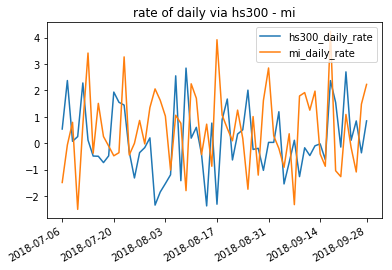

In [7]:
import matplotlib.dates as mdates
hs300 = ts.get_k_data('hs300')
hs300_r = ((hs300['close'] - hs300['open']) / hs300['open']) * 100
mi = ts.get_k_data('399139')
mi_r = ((mi['close'] - mi['open']) / mi['open']) * 100
date = hs300.date[-60:].values

ax = plt.gca() # 获取横坐标
ax.plot(date, hs300_r[-60:], label='hs300_daily_rate')
ax.plot(date, mi_r[-60:], label='mi_daily_rate')
# 配置横坐标，以20天为间隔，时间为横轴
xticks = list(range(0, len(date), 10)) # 获取时间对应位子 
xlabels = [date[x] for x in xticks] # 生成时间标签
xticks.append(len(date))
xlabels.append(date[-1])

ax.set_xticks(xlabels) # 设置横轴
plt.gcf().autofmt_xdate() # 设置 x 轴 label 旋转
plt.title('rate of daily via hs300 - mi')
plt.legend(loc='upper right')
plt.show()

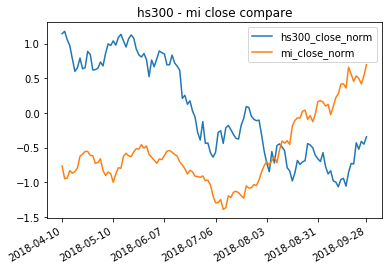

In [8]:
hs300_c_norm = (hs300.close - hs300.close.mean()) / hs300.close.std()
mi_c_norm = (mi.close - mi.close.mean()) / mi.close.std()
date = hs300.date[-120:].values

ax = plt.gca() # 获取横坐标
ax.plot(date, hs300_c_norm[-120:], label='hs300_close_norm') 
ax.plot(date, mi_c_norm[-120:], label='mi_close_norm')
# 配置横坐标，以20天为间隔，时间为横轴
xticks = list(range(0, len(date), 20)) # 获取时间对应位子 
xlabels = [date[x] for x in xticks] # 生成时间标签
xticks.append(len(date))
xlabels.append(date[-1])

ax.set_xticks(xlabels) # 设置横轴
plt.gcf().autofmt_xdate() # 设置 x 轴 label 旋转
plt.title('hs300 - mi close compare')
plt.legend(loc='upper right')
plt.show()